In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)

In [8]:
training_accuracy = []
test_accuracy = []

In [9]:
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

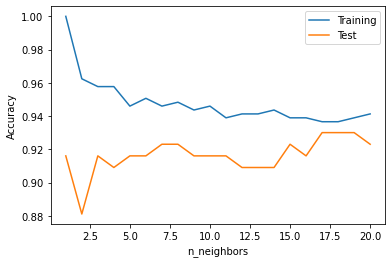

In [10]:
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [12]:
import requests, zipfile
import io
# きのこデータを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

In [13]:
# 取得したデータをDataFrameで読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

In [14]:
# データの列にラベルを設定
mushroom.columns = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'odor', 'bruises',
                   'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 
                   'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                   'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
                   'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

In [17]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color', 'gill_attachment', 'odor', 'cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

In [36]:
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
Z = mushroom_dummy['gill_color_b']
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

      gill_color_b  gill_color_e  gill_color_g  gill_color_h  gill_color_k  \
0                0             0             0             0             1   
1                0             0             0             0             1   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             1   
...            ...           ...           ...           ...           ...   
8119             0             0             0             0             0   
8120             0             0             0             0             0   
8121             0             0             0             0             0   
8122             1             0             0             0             0   
8123             0             0             0             0             0   

      gill_color_n  gill_color_o  gill_color_p  gill_color_r  g

In [37]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

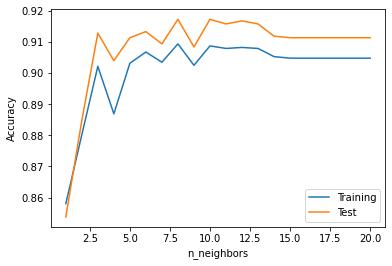

In [38]:
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()